In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading and understanding data 
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\Neural networks\\Alphabets_data.csv")

In [37]:
df.shape

(20000, 17)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   letter  20000 non-null  int32
 1   xbox    20000 non-null  int64
 2   ybox    20000 non-null  int64
 3   width   20000 non-null  int64
 4   height  20000 non-null  int64
 5   onpix   20000 non-null  int64
 6   xbar    20000 non-null  int64
 7   ybar    20000 non-null  int64
 8   x2bar   20000 non-null  int64
 9   y2bar   20000 non-null  int64
 10  xybar   20000 non-null  int64
 11  x2ybar  20000 non-null  int64
 12  xy2bar  20000 non-null  int64
 13  xedge   20000 non-null  int64
 14  xedgey  20000 non-null  int64
 15  yedge   20000 non-null  int64
 16  yedgex  20000 non-null  int64
dtypes: int32(1), int64(16)
memory usage: 2.5 MB


In [41]:
df['letter'].value_counts()

letter
20    813
3     805
15    803
19    796
12    792
0     789
23    787
24    786
13    783
16    783
5     775
6     773
4     768
1     766
21    764
11    761
17    758
8     755
14    753
22    752
18    748
9     747
10    739
2     736
7     734
25    734
Name: count, dtype: int64

In [7]:
# Check for missing values
print(df.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [9]:
# Encoding target labels (col = letter)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])

X = df.drop('letter', axis=1)
y = df['letter']

In [43]:
# Normalize using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [51]:
# importing required libraries for ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [15]:
# ANN model implemenntation
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # for multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3061 - loss: 2.5201 - val_accuracy: 0.7019 - val_loss: 1.0788
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7245 - loss: 0.9743 - val_accuracy: 0.7906 - val_loss: 0.7850
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7974 - loss: 0.7245 - val_accuracy: 0.8269 - val_loss: 0.6561
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8280 - loss: 0.5972 - val_accuracy: 0.8400 - val_loss: 0.5790
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8511 - loss: 0.5371 - val_accuracy: 0.8612 - val_loss: 0.5089
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8620 - loss: 0.4698 - val_accuracy: 0.8662 - val_loss: 0.4870
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8751 - loss: 0.4288 - val_accuracy: 0.8763 - val_loss: 0.4351
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8885 - loss: 0.3878 - val_accurac

In [47]:
# model evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
# Accuracy and Classification Report
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.92775

Classification Report:
               precision    recall  f1-score   support

           A       0.94      0.95      0.94       158
           B       0.86      0.93      0.89       153
           C       0.87      0.97      0.92       147
           D       0.92      0.94      0.93       161
           E       0.89      0.93      0.91       154
           F       0.96      0.86      0.90       155
           G       0.92      0.86      0.89       155
           H       0.84      0.90      0.87       147
           I       0.93      0.91      0.92       151
           J       0.90      0.95      0.93       149
           K       0.96      0.90      0.93       148
           L       0.97      0.94      0.95       152
           M       0.98      0.95      0.96       158
           N       0.97      0.89      0.93       157
           O       0.94      0.90      0.92       150
           P       0.90      0.95      0.92       161
           Q       0.96      0.96     

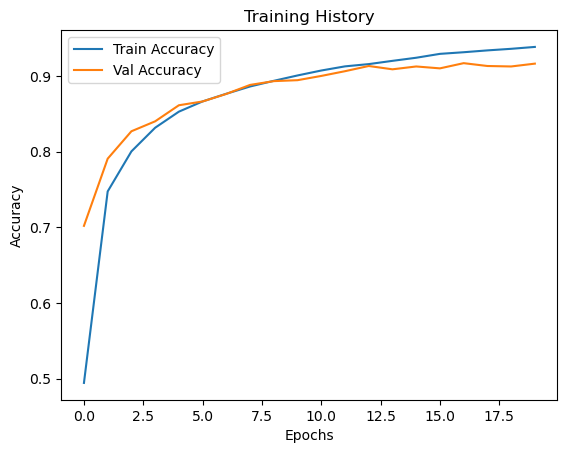

In [21]:
# plotting training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()


In [33]:
# hyper parameter tuning
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        hp.Int('units_input', min_value=32, max_value=128, step=16),
        activation=hp.Choice('activation_input', ['relu', 'tanh']),
        input_shape=(X_train.shape[1],)
    ))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
            hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
            activation=hp.Choice(f'activation_{i}', ['relu', 'tanh'])
        ))
    model.add(Dense(len(le.classes_), activation='softmax'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='tuner_dir',
    project_name='alphabet_ann'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 00m 52s]
val_accuracy: 0.7071874737739563

Best val_accuracy So Far: 0.9315624833106995
Total elapsed time: 00h 04m 39s


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [55]:
# Evaluating tunned model
y_pred_tuned = np.argmax(best_model.predict(X_test), axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [57]:
# Accuracy and classification report for tunned data 
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_tuned, target_names=le.classes_))

Tuned Accuracy: 0.9295

Tuned Classification Report:
               precision    recall  f1-score   support

           A       0.98      0.96      0.97       158
           B       0.89      0.82      0.86       153
           C       0.95      0.97      0.96       147
           D       0.91      0.95      0.93       161
           E       0.89      0.92      0.90       154
           F       0.89      0.95      0.92       155
           G       0.94      0.89      0.91       155
           H       0.89      0.80      0.85       147
           I       0.95      0.87      0.91       151
           J       0.96      0.94      0.95       149
           K       0.84      0.95      0.89       148
           L       0.92      0.96      0.94       152
           M       0.97      0.95      0.96       158
           N       0.97      0.92      0.94       157
           O       0.92      0.95      0.93       150
           P       0.96      0.93      0.94       161
           Q       0.97    

# Report